<a href="https://colab.research.google.com/github/Hari-Soorya/G_C/blob/main/PolynomialRegression_Position_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
df.drop(['Position'],axis=1,inplace=True)
df

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [ ]:
x=df.iloc[:,:-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y=df.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
y_pre=lr.predict(x)
y_pre

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

Text(0, 0.5, 'Salary')

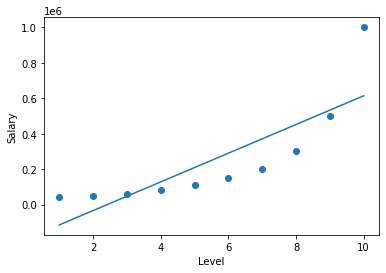

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_pre)
plt.xlabel('Level')
plt.ylabel('Salary')


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_po=pf.fit_transform(x)
x_po

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [ ]:
lr2=LinearRegression()
lr2.fit(x_po,y)
y_pr=lr2.predict(x_po)
y_pr

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391613])

Text(0, 0.5, 'Salary')

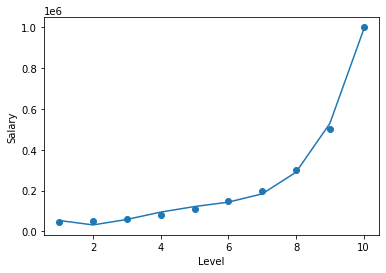

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pr)
plt.xlabel('Level')
plt.ylabel('Salary')

In [ ]:
data=pd.DataFrame({'Actual':y,'Predicted_Simple':y_pre,'Predicted_Poly':y_pr})
data

,Actual,Predicted_Simple,Predicted_Poly
0,45000,-114454.545455,53356.643357
1,50000,-33575.757576,31759.906760
2,60000,47303.030303,58642.191142
3,80000,128181.818182,94632.867133
4,110000,209060.606061,121724.941725
5,150000,289939.393939,143275.058275
6,200000,370818.181818,184003.496504
7,300000,451696.969697,289994.172494
8,500000,532575.757576,528694.638695
9,1000000,613454.545455,988916.083916


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE of Simple Linear is ',mean_absolute_error(y,y_pre))
print('MAE of Polynomial is ',mean_absolute_error(y,y_pr))
print('*'*100)
print('MSE of Simple Linear is ',mean_squared_error(y,y_pre))
print('MSE of Polynomial is ',mean_squared_error(y,y_pr))
print('*'*100)
print('RMSE of Simple Linear is ',np.sqrt(mean_squared_error(y,y_pre)))
print('RMSE of Polynomial is ',np.sqrt(mean_squared_error(y,y_pr)))

MAE of Simple Linear is  128454.54545454546
MAE of Polynomial is  12681.818181828148
****************************************************************************************************
MSE of Simple Linear is  26695878787.878784
MSE of Polynomial is  210343822.8438155
****************************************************************************************************
RMSE of Simple Linear is  163388.73519272613
RMSE of Polynomial is  14503.234909626732


In [ ]:
y_newpre=lr2.predict(pf.fit_transform([[15]]))
y_newpre

array([11216684.14918924])

R-squred is a statistical measure that represents the goodness of fit of a regression model. The ideal value of r-square is 1. The closer the value of r-square to 1, the better is the model fitted.

In [ ]:
from sklearn.metrics import r2_score
print('R2 square value is ',r2_score(y,y_pr))

R2 square value is  0.9973922891706615
